## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

In [6]:
# 그래프 그려보기

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [10]:
import glob
file = glob.glob(('data/*.csv'))
print(file)

['data\\seoul-covid19-2021-12-18.csv', 'data\\seoul-covid19-2021-12-26.csv', 'data\\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', 'data\\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv']


In [13]:
# seoul-covid19-2021-12-18.csv 불러오기
# df_01 변수에 담아 재사용합니다.
df_01 = pd.read_csv(file[0])
print(df_01.shape)

(200000, 7)


## head, tail, sample 로 일부 데이터만 보기

In [12]:
df_01.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [15]:
# seoul-covid19-2021-12-26.csv 불러오기
# df_02 변수에 담아 재사용합니다.
df_02 = pd.read_csv(file[1])
print(df_02.shape)

(18646, 7)


In [16]:
# 일부데이터만 가져와보기
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
1,218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
2,218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
3,218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
4,218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [18]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
df = pd.concat([df_01,df_02],axis=0)
df.reset_index(inplace=True, drop=True)
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
218641,200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
218642,200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
218643,200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원
218644,200002,562971,2021-12-18,중구,-,기타 확진자 접촉,NaN


## 합친 데이터 확인하기

In [21]:
# head, tail, sample 을 통해 데이터 확인하기
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [22]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
218641,200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
218642,200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
218643,200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원
218644,200002,562971,2021-12-18,중구,-,기타 확진자 접촉,NaN
218645,200001,561831,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [20]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
213293,205353,576613,2021-12-21,강남구,-,기타 확진자 접촉,NaN


## 중복 제거하기

In [26]:
df.drop_duplicates(inplace=True)

## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [27]:
# shape
df.shape

(218646, 7)

In [28]:
# 연번의 nunique()
df['연번'].nunique()

218646

In [32]:
# set_index 를 통해 인덱스 값을 변경합니다.
df.set_index('연번', inplace=True)

## 연번 순으로 정렬하기

In [33]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df.sort_index(inplace=True)

In [34]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원


In [35]:
# tail로 미리보기 합니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)


In [39]:
# shape
df.shape

(218646, 6)

In [40]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [41]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [42]:
# index
df.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            218637, 218638, 218639, 218640, 218641, 218642, 218643, 218644,
            218645, 218646],
           dtype='int64', name='연번', length=218646)

## 데이터 요약

In [43]:
# info를 통해 데이터를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218646 entries, 1 to 218646
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      218646 non-null  int64 
 1   확진일     218646 non-null  object
 2   거주지     218646 non-null  object
 3   여행력     218646 non-null  object
 4   접촉력     218646 non-null  object
 5   퇴원현황    163497 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.7+ MB


## 결측치 보기

In [45]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    55149
dtype: int64

In [49]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean()

환자      0.00000
확진일     0.00000
거주지     0.00000
여행력     0.00000
접촉력     0.00000
퇴원현황    0.25223
dtype: float64

## 기술통계

In [50]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,218646.000000
mean,322462.160977
std,173903.371149
min,2.000000
25%,168409.250000
50%,336181.500000
75%,470149.500000
max,611669.000000


In [51]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include='object')

,확진일,거주지,여행력,접촉력,퇴원현황
count,218646,218646,218646,218646,163497
unique,671,34,183,1417,2
top,2021-12-14,송파구,-,기타 확진자 접촉,퇴원
freq,3165,13235,215575,90055,161849


## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [52]:
# 확진일 Series 형태로 가져오기
df['확진일']

연번
1         2020-01-24
2         2020-01-30
3         2020-01-30
4         2020-01-30
5         2020-01-31
             ...    
218642    2021-12-26
218643    2021-12-26
218644    2021-12-26
218645    2021-12-26
218646    2021-12-26
Name: 확진일, Length: 218646, dtype: object

In [56]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
df['확진일'] = pd.to_datetime(df['확진일'])

In [57]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df['확진일'].head()

연번
1   2020-01-24
2   2020-01-30
3   2020-01-30
4   2020-01-30
5   2020-01-31
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

In [65]:
# 연도 파생변수 만들기
df["연도"]
df['연도'] = df['확진일'].dt.year

In [64]:
# 월(month), 일(day), 요일(dayofweek) 만들기
df["월"] = df['확진일'].dt.month
df["일"] = df['확진일'].dt.day
df["요일"] = df['확진일'].dt.dayofweek

In [70]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기
print('요일 :',sorted(df['요일'].unique()))
df.head()

요일 : [0, 1, 2, 3, 4, 5, 6]


,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4


### 연도-월 만들기

In [83]:
# 연도-월 파생변수 만들기
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
df['연도월'] = df['연도'].astype(str) + '-' + df['월'].astype(str)

In [82]:
# 문자열 슬라이싱으로도 만들 수 있습니다.
df['연도월'] = df['확진일'].astype(str).str[:7]

In [84]:
# df["연도월"]이 잘 생성되었는지 확인하기
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-1
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-1
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-1
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-1
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-1


### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [85]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [86]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [87]:
# 함수가 잘 만들어졌는지 확인하기
find_dayofweek(0)

'월'

In [99]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기

# df['요일'].apply(lambda x : find_dayofweek(x))
# df['요일'] = [find_dayofweek(x) for x in df['요일']]
df["요일명"] = df['요일'].map(find_dayofweek)

In [93]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
df[['요일','요일명']].sample(5)

,요일,요일명
연번,,
187940,1,화
73620,3,목
28095,4,금
161342,4,금
35028,3,목


## 전체 수치 변수 히스토그램 그리기

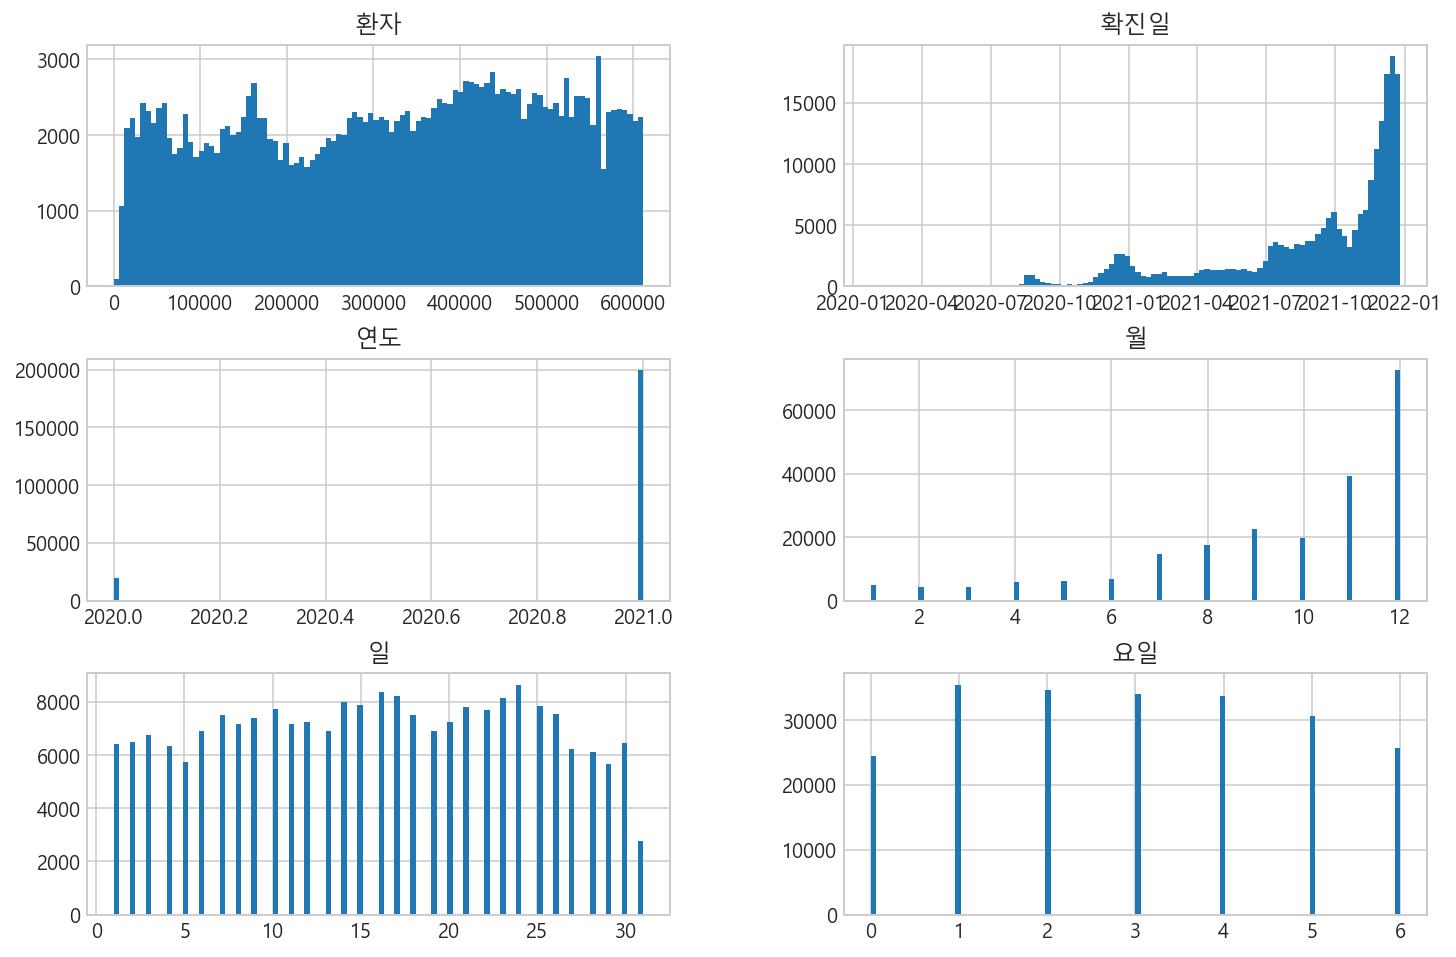

In [101]:
# df.hist로 히스토그램 그리기
df.hist(figsize=(12,8), bins=100)
plt.show()

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [103]:
# "연도" 컬럼을 통해 빈도수 구하기
df['연도'].value_counts()

2021    199253
2020     19393
Name: 연도, dtype: int64

In [105]:
# "연도" 컬럼의 비율 구하기
df['연도'].value_counts() / len(df['연도']) * 100

2021    91.130412
2020     8.869588
Name: 연도, dtype: float64

### 연도월

In [122]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index 로 정렬합니다.
year_month = df['연도월'].value_counts().sort_index()
year_month.head()

2020-1         7
2020-10      733
2020-11     2904
2020-12    10432
2020-2        80
Name: 연도월, dtype: int64

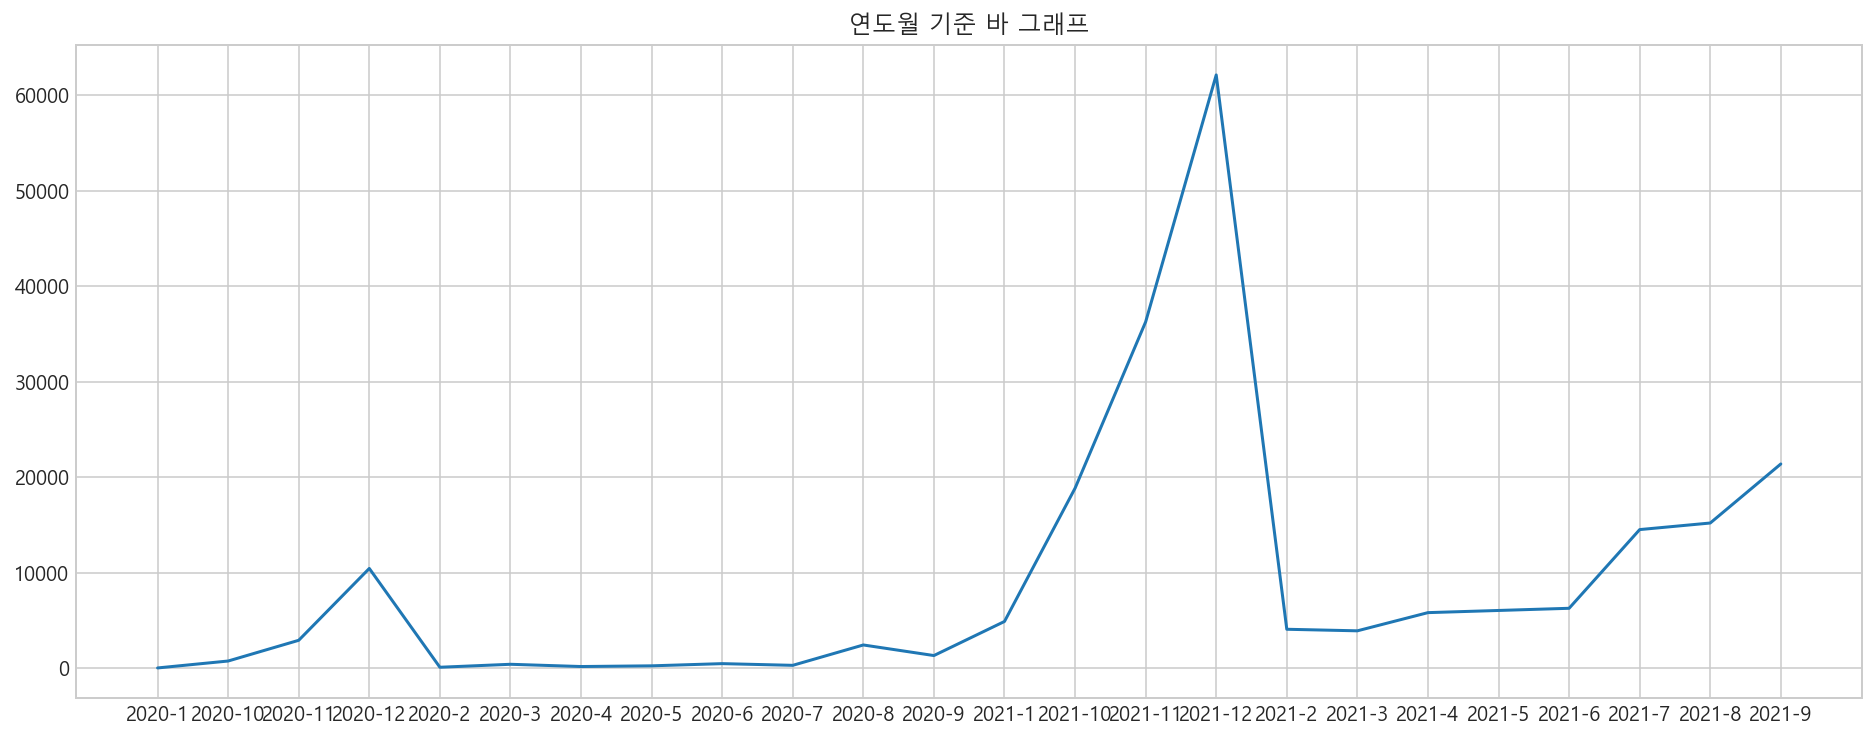

In [124]:
# 연도월을 시각화 합니다.
plt.figure(figsize=(16,6))
plt.plot(year_month.index, year_month.values)
plt.title('연도월 기준 바 그래프')
plt.show()

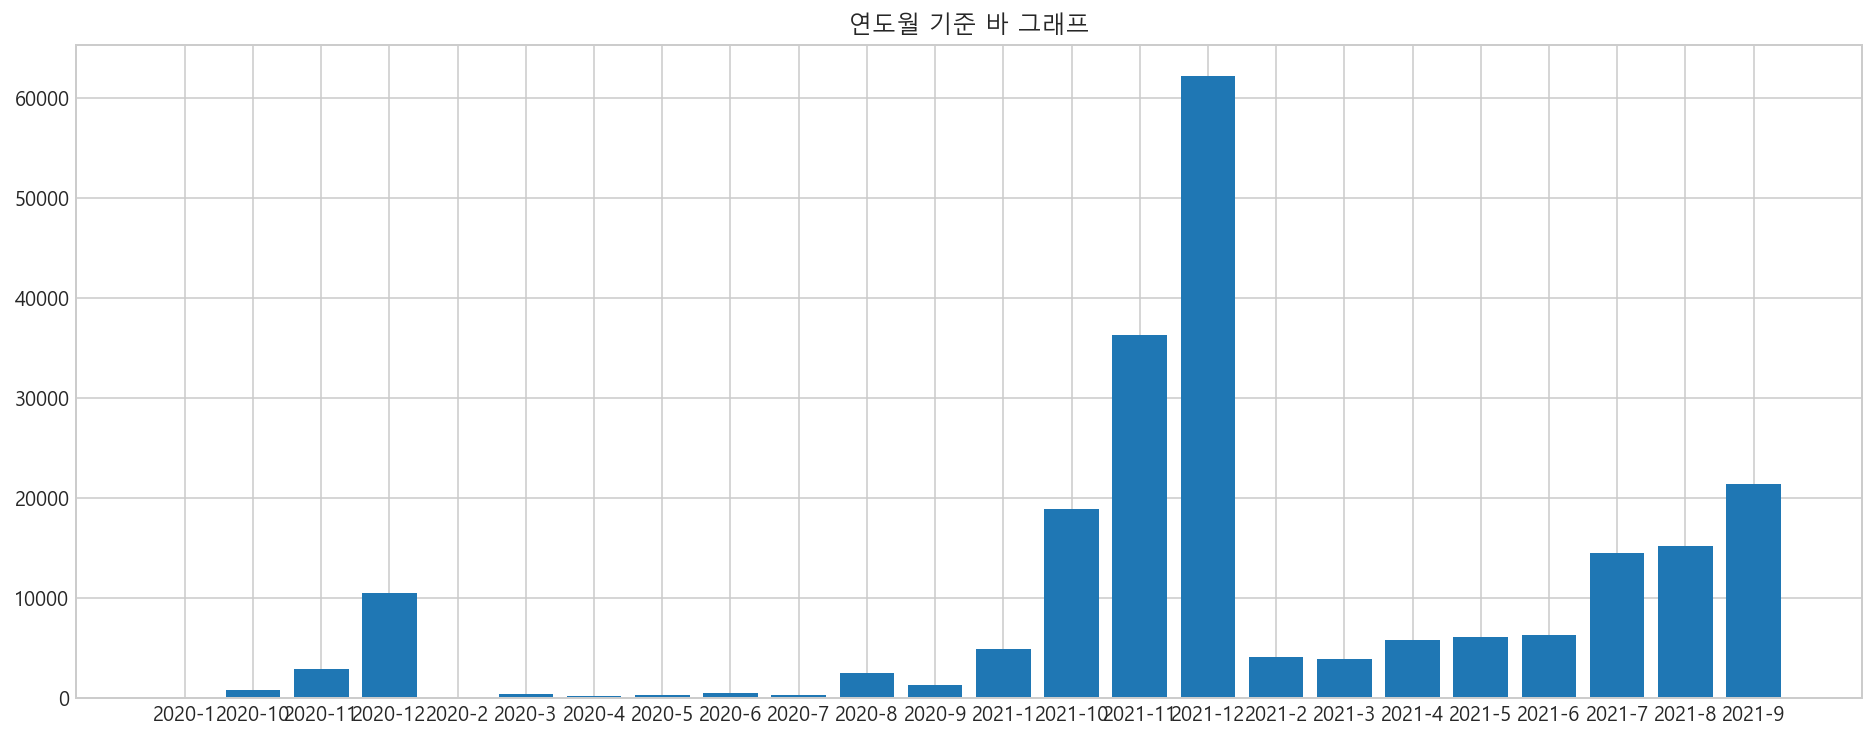

In [123]:
# 연도월을 막대 그래프로 시각화 합니다.
plt.figure(figsize=(16,6))
plt.bar(year_month.index, year_month.values)
plt.title('연도월 기준 바 그래프')
plt.show()

### 요일별 빈도수 구하기

In [130]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
weekday_count = df['요일'].value_counts().sort_index()
weekday_count

0    24516
1    35471
2    34548
3    34030
4    33655
5    30692
6    25734
Name: 요일, dtype: int64

In [138]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
weekday_list  = list("월화수목금토일")

In [139]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
weekday_count.index = weekday_list
weekday_count

월    24516
화    35471
수    34548
목    34030
금    33655
토    30692
일    25734
Name: 요일, dtype: int64

### 확진일 빈도수 구하기

In [143]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
day_count = df['확진일'].value_counts().sort_index()
day_count.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일, dtype: int64

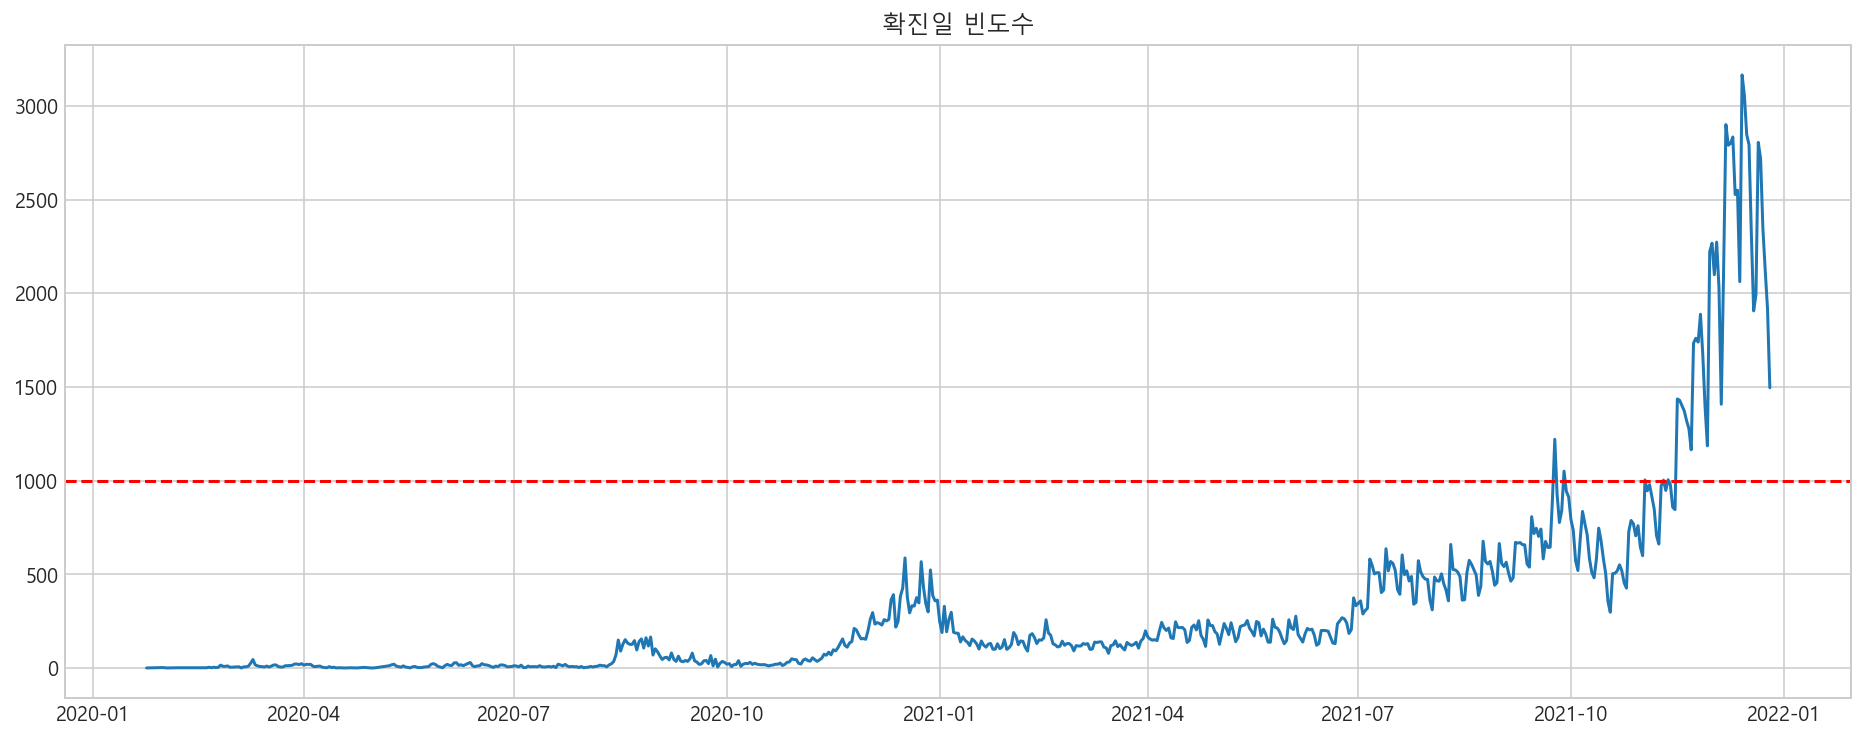

In [147]:
# 선 그래프로 시각화 하기
plt.figure(figsize=(16,6))
plt.plot(day_count.index, day_count.values)
plt.axhline(1000,c='r', linestyle='--')
plt.title('확진일 빈도수')
plt.show()

## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

In [148]:
# head(10)로 10번째 확진 데이터를 봅니다.
df.head(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-1,금
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-1,목
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-1,금
6,10,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-1,금
7,11,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-1,금
8,13,2020-02-02,타시도,중국,해외유입,퇴원,2020,2,2,6,2020-2,일
9,19,2020-02-05,송파구,아시아,해외유입,퇴원,2020,2,5,2,2020-2,수


### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [152]:
# last_day
last_day = df.iloc[-1,1]
last_day

Timestamp('2021-12-26 00:00:00')

In [153]:
# first_day
first_day = df.iloc[0,1]
first_day

Timestamp('2020-01-24 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [155]:
# pd.date_range 로 전체 기간을 생성합니다.
# all_day
all_day = pd.date_range(first_day, last_day)
all_day

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26'],
              dtype='datetime64[ns]', length=703, freq='D')

In [174]:
# all_day 를 데이터프레임으로 변환합니다.
df_all_day = all_day.to_frame()
df_all_day.head(2)

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25


In [175]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.
df_all_day['확진수'] = day_count
df_all_day.head(2)

,확진수
2020-01-24,1.0
2020-01-25,NaN


In [ ]:
# 필요 없는 0 컬럼을 삭제합니다.
del df_all_day[0]

### 결측치 채우기

In [183]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.
df_all_day = df_all_day.fillna(0).astype(int)
df_all_day.head(5)

,확진수
2020-01-24,1
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0


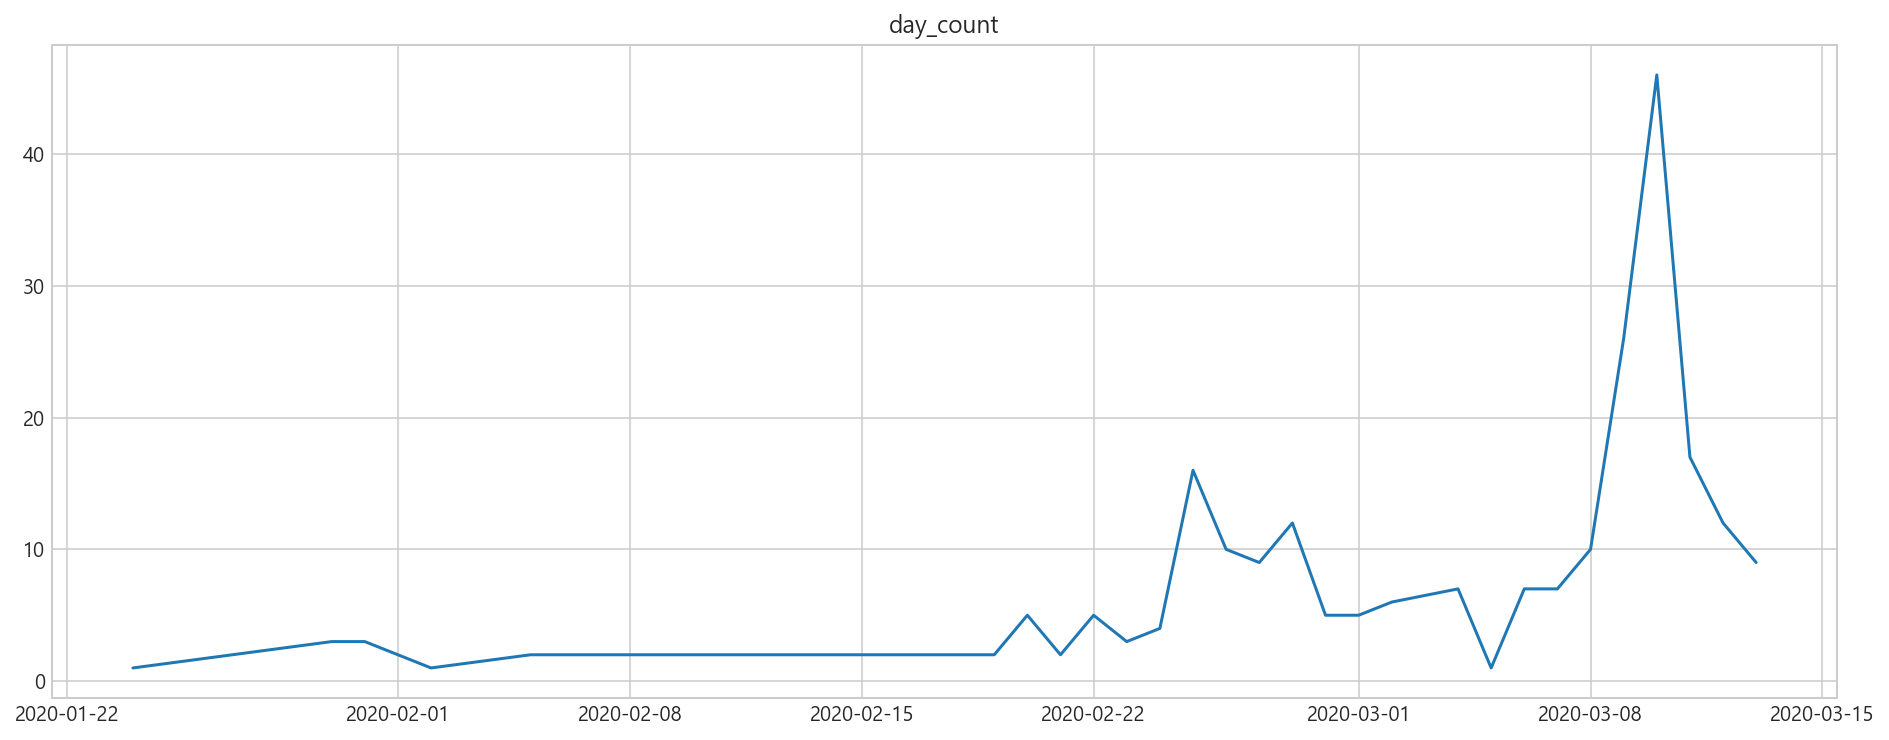

In [184]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.
plt.figure(figsize=(16,6))
plt.plot(day_count.head(30).index, day_count.head(30).values)
plt.title('day_count')
plt.show()

### 누적 확진 수 구하기

In [185]:
# df
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-1,금
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-1,목
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-1,금
...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일


In [191]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
df_all_day["누적확진수"] = np.cumsum(df_all_day['확진수'])
df_all_day.head(10)

,확진수,누적확진수
2020-01-24,1,1
2020-01-25,0,1
2020-01-26,0,1
2020-01-27,0,1
2020-01-28,0,1
2020-01-29,0,1
2020-01-30,3,4
2020-01-31,3,7
2020-02-01,0,7
2020-02-02,1,8


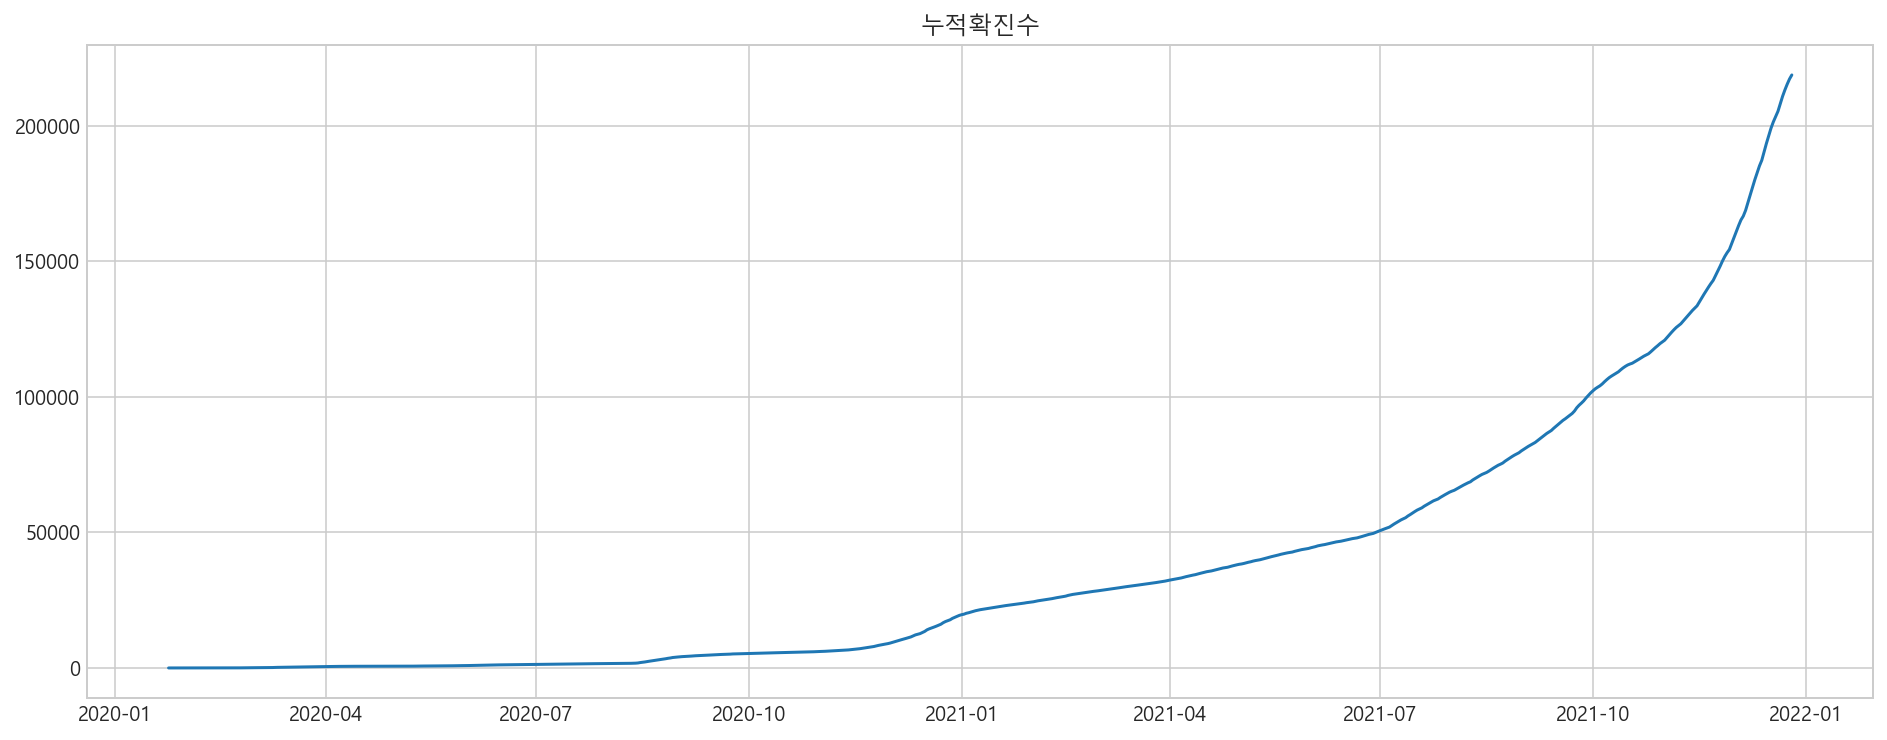

In [193]:
# 시각화 하기
plt.figure(figsize=(16,6))
plt.plot(df_all_day['누적확진수'].index,df_all_day['누적확진수'].values)
plt.title('누적확진수')
plt.show()

## 거주지

In [196]:
# 거주지 빈도수 구하기
df['거주지'].value_counts().head(10)

송파구     13235
강남구     12150
타시도     11320
관악구     10992
구로구     10346
영등포구    10225
강서구     10150
은평구      9393
노원구      9327
성북구      9142
Name: 거주지, dtype: int64

### 타시도, 기타 전처리

In [198]:
# "거주지" => "거주구"로 사본 생성
df["거주구"] = df['거주지'].copy()
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-1,금,강서구
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목,중랑구
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-1,목,종로구
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목,마포구
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-1,금,성북구


In [203]:
# 텍스트 앞뒤 공백 제거하기
df['거주구'] = df['거주구'].str.strip()

In [211]:
# 타시도 => 기타로 변경하기
df['거주구'] = df['거주구'].replace('타시도','기타')
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-1,금,강서구
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목,중랑구
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-1,목,종로구
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목,마포구
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-1,금,성북구


In [213]:
# "거주구" 빈도수 구하기
gu_count = df['거주구'].value_counts()
gu_count.head()

기타     16316
송파구    13235
강남구    12150
관악구    10992
구로구    10346
Name: 거주구, dtype: int64

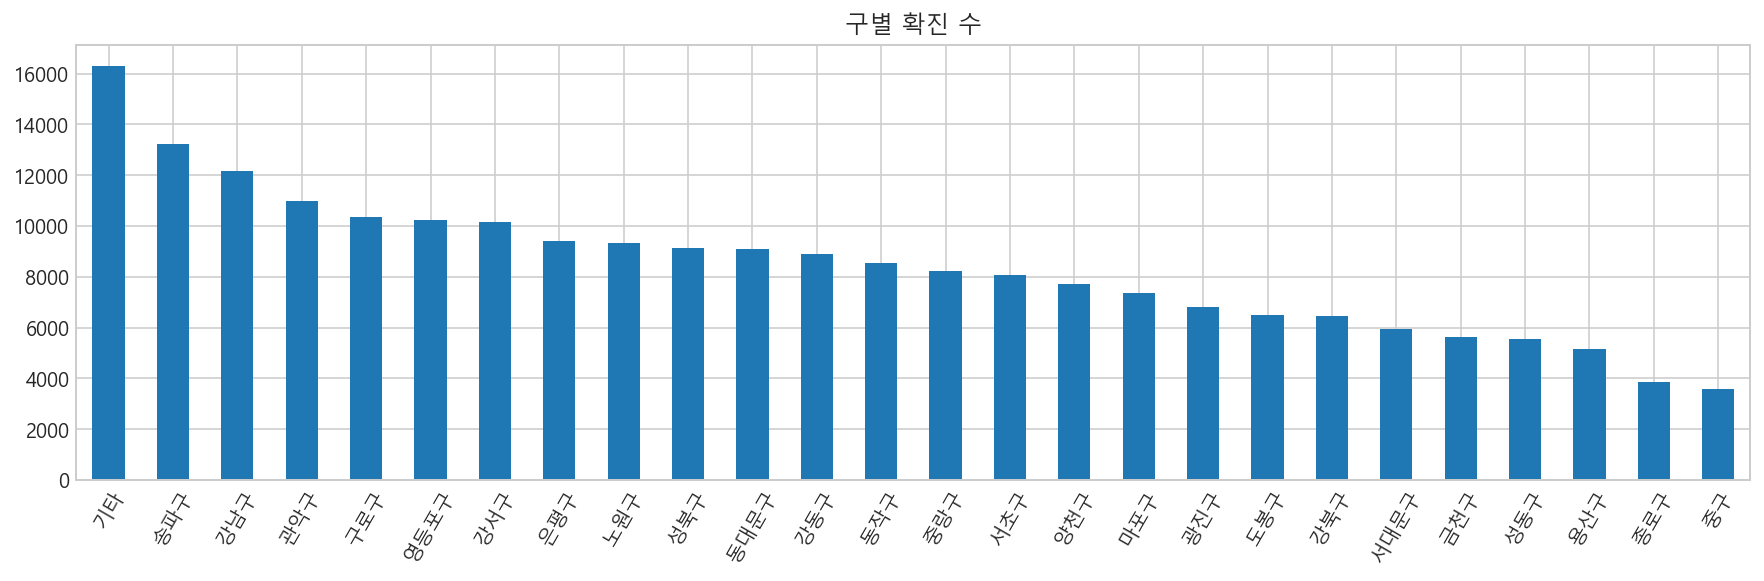

In [216]:
# gu_count 변수에 담긴 값 시각화 하기
gu_count.plot(kind='bar', figsize=(15,4), title='구별 확진 수',rot=60)
plt.show()

## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [218]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기
pd.crosstab(df['연도'], df['퇴원현황'])

퇴원현황,사망,퇴원
연도,,
2020,308,19085
2021,1340,142764


In [220]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기
pd.crosstab(df['연도'], df['퇴원현황'], normalize=True)*100

퇴원현황,사망,퇴원
연도,,
2020,0.188383,11.672997
2021,0.819587,87.319033


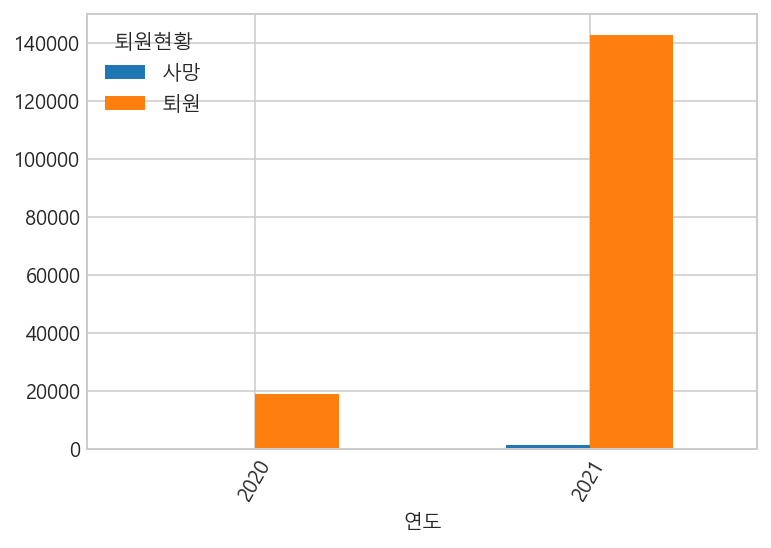

In [224]:
pd.crosstab(df['연도'],df['퇴원현황']).plot(kind='bar',rot=60)
plt.show()

### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [221]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기
pd.crosstab(df['연도'],df['월'])

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10432
2021,4878,4060,3897,5803,6030,6258,14504,15193,21382,18840,36267,62141


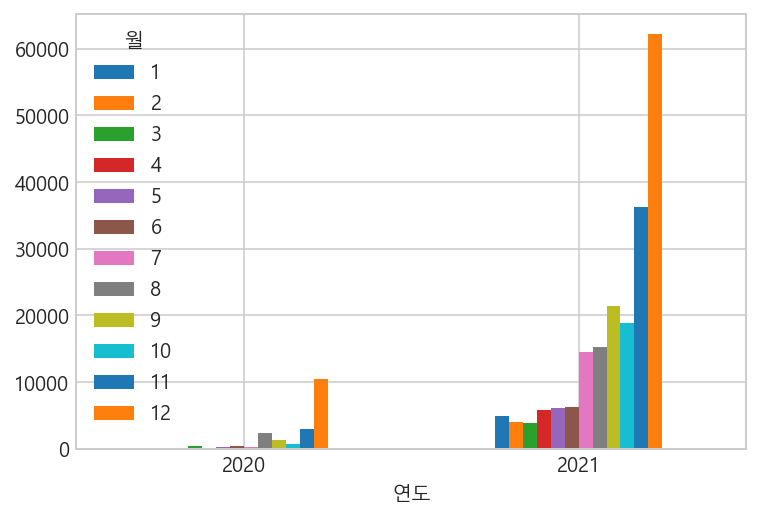

In [233]:
# 시각화 하기
pd.crosstab(df['연도'],df['월']).plot(kind='bar',rot=0)
plt.show()

### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [238]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기
ydow = pd.crosstab(df['연도'], df['요일'])
ydow

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


In [237]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list
weekday_list = [x for x in dayofweek]
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [239]:
# 컬럼명 변경하기
ydow.columns = weekday_list
ydow

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


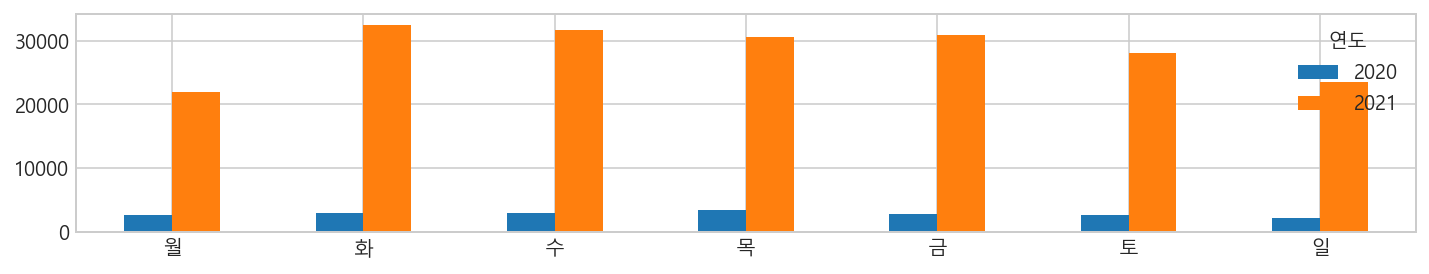

In [243]:
ydow.T.plot(kind='bar', rot=0, figsize=(12,2))
plt.show()

### 거주구, 연도월에 대한 빈도수 구하기

In [252]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기
gu_month = pd.crosstab(df['거주구'],df['연도월'])
gu_month.iloc[:5,:5]

연도월,2020-1,2020-10,2020-11,2020-12,2020-2
거주구,,,,,
강남구,0,87,156,422,7
강동구,0,19,74,304,4
강북구,0,15,41,245,0
강서구,1,22,305,727,1
관악구,0,86,74,472,4


In [249]:
# background_gradient() 로 빈도수 표현하기
gu_month.style.background_gradient(cmap='magma', low=1)

연도월,2020-1,2020-10,2020-11,2020-12,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2021-1,2021-10,2021-11,2021-12,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9
거주구,,,,,,,,,,,,,,,,,,,,,,,,
강남구,0,87,156,422,7,34,23,11,8,15,88,84,227,905,1286,2930,118,240,428,529,792,1249,1287,1224
강동구,0,19,74,304,4,6,3,11,11,14,94,42,179,940,1582,2473,161,252,253,314,284,523,456,884
강북구,0,15,41,245,0,5,0,9,10,4,85,31,174,649,1162,1958,124,125,133,266,164,348,333,568
강서구,1,22,305,727,1,20,4,19,33,25,117,65,215,711,1771,3144,96,133,217,189,213,576,651,895
관악구,0,86,74,472,4,30,9,16,58,27,106,135,162,802,1809,2886,182,129,313,226,268,1133,1001,1064
광진구,0,11,43,277,1,5,2,6,3,5,74,34,120,485,985,1781,155,253,238,215,236,468,531,891
구로구,0,22,72,347,1,33,1,6,45,5,60,32,181,1566,2021,2487,237,126,142,183,160,566,629,1424
금천구,0,5,27,201,1,11,0,3,17,7,34,20,72,656,1179,1672,69,26,84,146,103,334,374,595
기타,0,82,204,1621,10,22,13,12,25,12,175,128,606,1273,2549,5322,415,243,319,249,341,682,807,1206


In [261]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
# background_gradient()
gu_month.T.style.background_gradient(cmap='BuPu', low=1)

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-10,87,19,15,22,86,11,22,5,82,33,22,24,28,26,10,39,18,17,61,13,18,21,19,7,7,21
2020-11,156,74,41,305,74,43,72,27,204,144,91,127,126,103,123,239,82,114,210,120,95,83,92,31,43,85
2020-12,422,304,245,727,472,277,347,201,1621,334,255,330,420,403,253,353,230,347,509,415,391,191,424,278,175,508
2020-2,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-3,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-4,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-5,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-6,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [266]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]
df[(df['거주지'] == '강남구') & (df['요일명']=='일')]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
90,3616,2020-03-01,강남구,-,감염경로 조사중,퇴원,2020,3,1,6,2020-3,일,강남구
126,7280,2020-03-08,강남구,-,EZHLD,퇴원,2020,3,8,6,2020-3,일,강남구
428,9603,2020-03-29,강남구,미국,해외유입,퇴원,2020,3,29,6,2020-3,일,강남구
429,9607,2020-03-29,강남구,유럽,해외유입,퇴원,2020,3,29,6,2020-3,일,강남구
430,9642,2020-03-29,강남구,-,감염경로 조사중,퇴원,2020,3,29,6,2020-3,일,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218315,607637,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218318,607636,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218382,607626,2021-12-26,강남구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,강남구


In [267]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기
df[(df['거주구']=='강남구') & (df['여행력']=='일본')]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
15746,52848,2020-12-23,강남구,일본,해외유입,퇴원,2020,12,23,2,2020-12,수,강남구
31135,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-3,수,강남구
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-6,수,강남구


### str.contains 활용하기

In [272]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기
df['접촉력_대문자'] = df['접촉력'].str.upper()

In [292]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기
df[df['접촉력_대문자'].str.contains('PC방')]['접촉력_대문자'].value_counts()

용산구 소재 PC방 관련    82
강북구 소재 PC방 관련    58
강남구 소재 PC방 관련    32
동대문관련(교회PC방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력_대문자, dtype: int64

In [293]:
df[df['접촉력_대문자'].str.find('PC') > -1].head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
99,5592,2020-03-04,동대문구,-,동대문관련(교회pc방),퇴원,2020,3,4,2,2020-3,수,동대문구,동대문관련(교회PC방)
124,7300,2020-03-08,동대문구,-,동대문관련(교회pc방),퇴원,2020,3,8,6,2020-3,일,동대문구,동대문관련(교회PC방)
127,7247,2020-03-08,동대문구,-,동대문관련(교회pc방),퇴원,2020,3,8,6,2020-3,일,동대문구,동대문관련(교회PC방)
128,7234,2020-03-08,동대문구,-,동대문관련(교회pc방),퇴원,2020,3,8,6,2020-3,일,동대문구,동대문관련(교회PC방)
134,7437,2020-03-09,동작구,-,동대문관련(교회pc방),퇴원,2020,3,9,0,2020-3,월,동작구,동대문관련(교회PC방)


### isin 으로 여러 값 찾기

In [298]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기
df.loc[df['거주구'].isin(['강남구','서초구','송파구'])][['거주구','접촉력']]

,거주구,접촉력
연번,,
9,송파구,해외유입
23,서초구,타시도 확진자 접촉
26,서초구,타시도 확진자 접촉
30,송파구,타시도 확진자 접촉
31,서초구,타시도 확진자 접촉
...,...,...
218640,송파구,감염경로 조사중
218641,송파구,감염경로 조사중
218642,송파구,감염경로 조사중


## 여행력

In [309]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기
bool_in = df['접촉력'] == '해외유입'
df.loc[bool_in,'해외유입'] = '해외'
df.loc[~bool_in,'해외유입'] = '국내'
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자,해외유입
연번,,,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-1,금,강서구,해외유입,해외
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목,중랑구,해외유입,해외
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-1,목,종로구,종로구 집단발병,국내
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-1,목,마포구,해외유입,해외
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-1,금,성북구,기타 확진자 접촉,국내
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중,국내
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중,국내
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중,국내


In [314]:
# 거주구, 해외유입 빈도수 구하기
gu_oversea =  pd.crosstab(df['거주구'],df['해외유입'])
gu_oversea.iloc[:5,:5]

해외유입,국내,해외
거주구,,
강남구,11920,230
강동구,8817,66
강북구,6430,19
강서구,10035,115
관악구,10924,68


In [312]:
# 거주구 해외유입 비율 구하기
pd.crosstab(df['거주구'],df['해외유입'],normalize=True).iloc[:5,:5]

해외유입,국내,해외
거주구,,
강남구,0.054517,0.001052
강동구,0.040325,0.000302
강북구,0.029408,0.000087
강서구,0.045896,0.000526
관악구,0.049962,0.000311


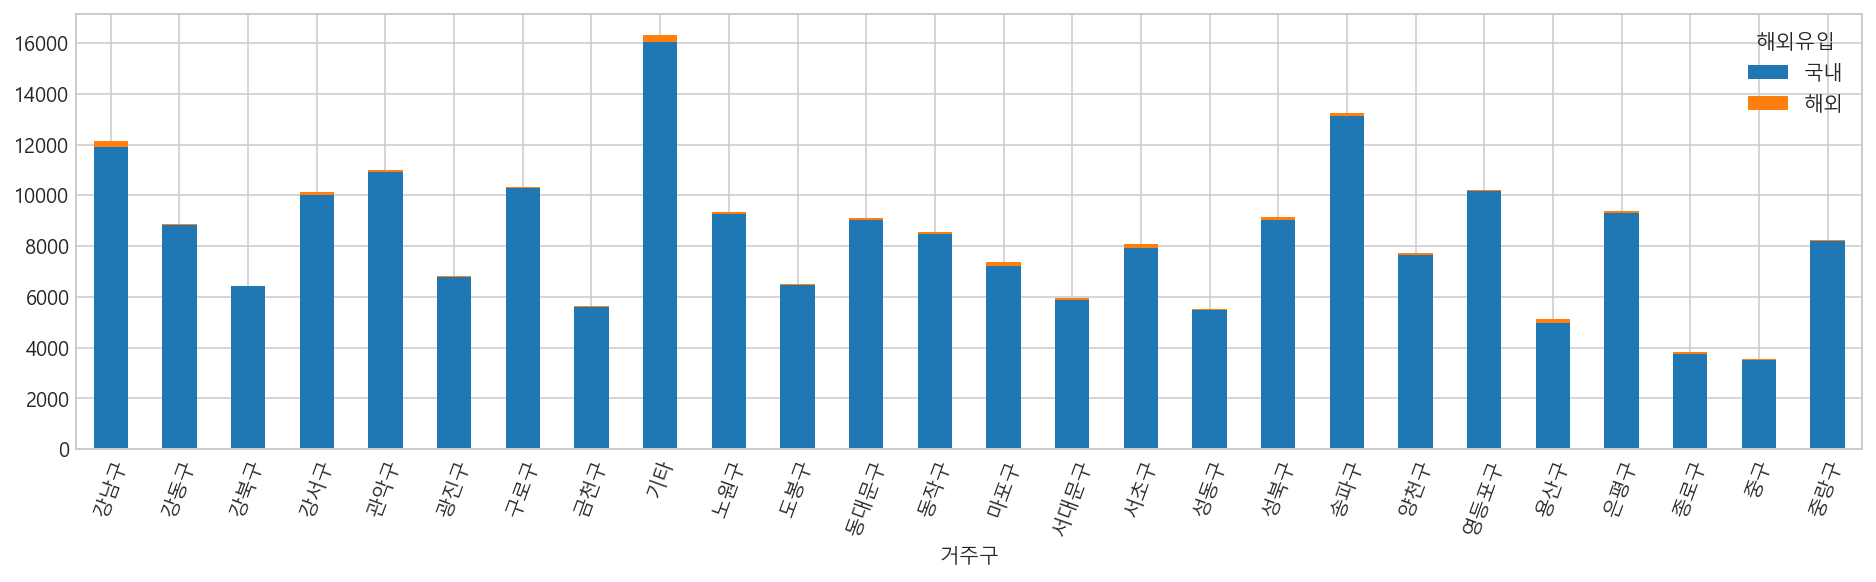

In [318]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.
gu_oversea.plot.bar(stacked=True, figsize=(16,4), rot=70)
plt.show()

## pivot_table 사용하기

In [321]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count
gu_over_count = pd.pivot_table(df, index = '거주구', columns='해외유입', values='환자', aggfunc='count')
gu_over_count.head()

해외유입,국내,해외
거주구,,
강남구,11920,230
강동구,8817,66
강북구,6430,19
강서구,10035,115
관악구,10924,68


In [322]:
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [349]:
# 거주구에 따른 요일별 확진자 빈도수
# df_gu_weekday[weekday_list].style.bar()
df_gu_weekday = pd.pivot_table(df,index='거주구',columns='요일',values='환자',aggfunc='count').T
df_gu_weekday.index = weekday_list
df_gu_weekday

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,1487,892,905,1130,1078,810,1095,546,1840,1212,...,665,1113,1326,883,996,583,1099,475,396,952
화,1969,1510,969,1589,1934,1096,1777,910,2219,1427,...,892,1350,2196,1311,1700,896,1627,579,563,1333
수,1960,1414,957,1642,1739,1047,1604,876,3096,1484,...,852,1374,2016,1167,1676,794,1442,574,622,1248
목,1791,1392,1031,1635,1653,1060,1595,924,2787,1337,...,824,1396,2126,1124,1641,768,1487,569,522,1287
금,1892,1335,939,1629,1688,1047,1607,894,2431,1400,...,865,1322,2016,1222,1596,793,1491,608,574,1210
토,1626,1300,881,1391,1575,921,1540,804,2277,1297,...,792,1317,1887,1050,1445,718,1209,537,486,1162
일,1425,1040,767,1134,1325,838,1128,682,1666,1170,...,640,1270,1668,957,1171,587,1038,496,407,1044


## groupby 사용하기

In [353]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기
pd.DataFrame(df.groupby(['거주구','해외유입'])['환자'].count()).head(10)

환자
거주구 해외유입       
강남구 국내    11920
    해외      230
강동구 국내     8817
    해외       66
강북구 국내     6430
    해외       19
강서구 국내    10035
    해외      115
관악구 국내    10924
    해외       68

### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [ ]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기


In [ ]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기


In [ ]:
# unstack()으로 월을 컬럼으로 만들기


In [ ]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
